<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 2</h3></center> 



[Notebook](https://colab.research.google.com/drive/1CKUlvdEa1bJLS2_P7UeaPUWSZ_ZDUDSH) due November 06, 2020 at [23.59 EST](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-11-06&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/773268)


In [1]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Not mandatory to use
from sklearn.utils import resample

import matplotlib.pyplot as plt

import seaborn as sns

# Uncomment this line below if using seaborn
sns.set() 

%matplotlib inline

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## PCA

#### **Q1**

**12 points** = $(1.5 + 2 + 2 + 1.5 + 1.5 + 2 + 1.5)$

The cell below loads a subset of the California Housing dataset. 

  (a) Store only the `latitude`, `longitude` and `median_house_value` columns in a dataframe denoted by a variable `features`. Produce a scatter plot of the data points with `longitude` along x-axis, `latitude` along y-axis and the points colored by `median_house_value` i.e. higher the `median_house_value`, darker the data point in the plot.
  
  (b) Perform a PCA on the subset of the dataframe you created in (a) with only the `latitude` and `longitude` columns. Produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a).

  (c) Provide a simple interpretation for what the first principal component `PC 1` could possibly represent in the plot in (b) by comparing it with that in (a). **Justify** your answer.
  
  (d) Repeat what you did in (b) above by setting the `whiten` parameter as `True` in the `PCA()` constructor and producing the plot. What difference do you observe? What do you think `whiten` does specifically in this problem?

  (e) Perform a PCA on the entire dataframe `features` with `whiten` set to `True` and produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a).   

  (f) Observe how the color indicating `median_house_value` varies in the plot you produced in (e). Is the variation of `median_house_value` depicted in this plot simpler than what is indicated by all the above plots? Provide an **explanation** for why it is (or) it is not the case.
  
  (g) The California Department of Housing and Community Development (HCD) releases additional information about the data samples you used  here, by providing an `price_index` tag that can take values `high`, `middle` or `low` based `median_house_value`. If you were to eventually use the principal components you produced in (e), which one(s) among the `PC 1`, `PC 2`, ..,. would you use to classify the data samples into these three categories (`high`, `middle` and `low`)? Concretely **justify** your choice.  

**Bonus : (3 points)**
> (h) In the plot that you observe in (a), you will remark two major clusters that are the *darkest*. Let us identify the cluster with the higher value of `latitude` as the `SF cluster` and the one with the lower value of `latitude` as the `LA cluster`. Verify programmatically if this clustering is preserved or distorted in the plot in (e). What does this tell you about what is represented by the second principal component `PC 2` produced in (e)?



In [2]:
housing = pd.read_csv(path.format('california_housing.csv'))

(a)

In [21]:
features = housing[['latitude', 'longitude', 'median_house_value']]
features.head()

,latitude,longitude,median_house_value
0,34.19,-114.31,66900.0
1,34.40,-114.47,80100.0
2,33.69,-114.56,85700.0
3,33.64,-114.57,73400.0
4,33.57,-114.57,65500.0


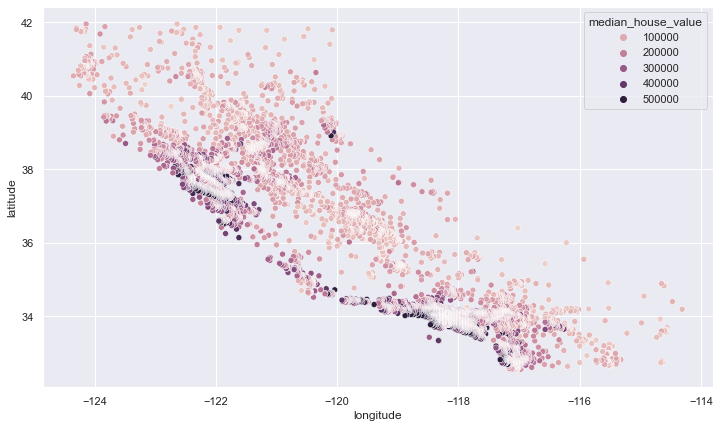

In [32]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=features, x='longitude', y='latitude', hue='median_house_value');

(b)

In [26]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(features[['latitude', 'longitude']])
pca_df = pd.DataFrame(data=pcs, columns = ['PC 1', 'PC 2'])
pca_df['median_house_value'] = features['median_house_value']

In [28]:
pca_df.head()

,PC 1,PC 2,median_house_value
0,-4.632846,2.860289,66900.0
1,-4.370153,2.886607,80100.0
2,-4.827792,2.336365,85700.0
3,-4.857522,2.294939,73400.0
4,-4.908696,2.247176,65500.0


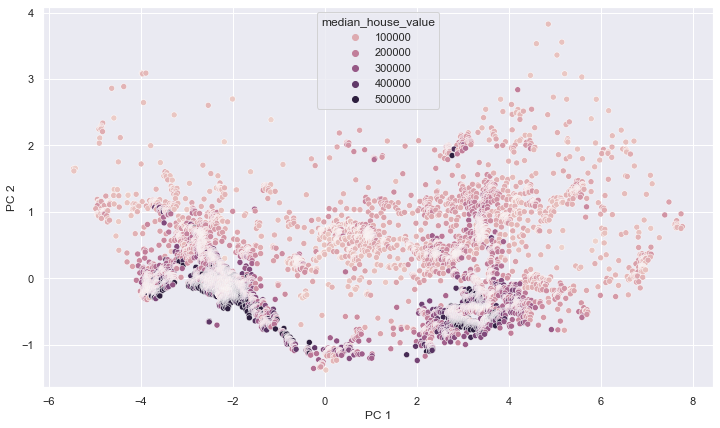

In [31]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue="median_house_value");

(c)

PC1 likely represents the downward slope in the original dataset, from top left to bottom right. In other words, it represents the decrease in latitude and increase in longitude (this can be translated to the south-western-ness of a point).

(d)

In [33]:
pca = PCA(n_components=2, whiten=True)
pcs = pca.fit_transform(features[['latitude', 'longitude']])
pca_df = pd.DataFrame(data=pcs, columns = ['PC 1', 'PC 2'])
pca_df['median_house_value'] = features['median_house_value']

In [34]:
pca_df.head()

,PC 1,PC 2,median_house_value
0,-1.611088,5.057651,66900.0
1,-1.519736,5.104189,80100.0
2,-1.678881,4.131233,85700.0
3,-1.689220,4.057982,73400.0
4,-1.707015,3.973527,65500.0


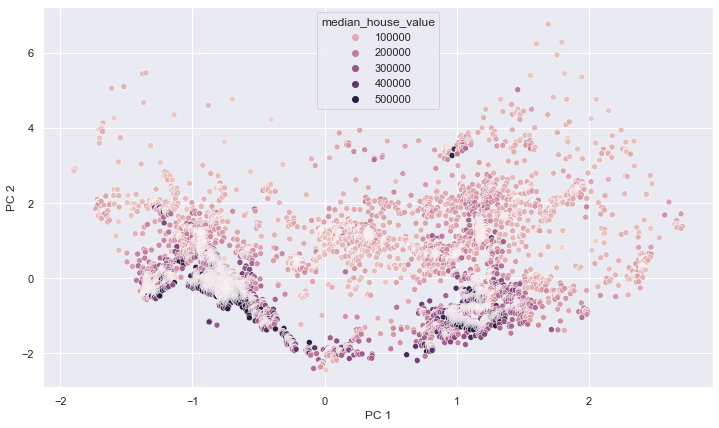

In [35]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue="median_house_value");

Hmmmmm, variance reduction?

(e)

In [37]:
pca = PCA(n_components=3, whiten=True)
pcs = pca.fit_transform(features)
pca_df = pd.DataFrame(data=pcs, columns = ['PC 1', 'PC 2', 'median_house_value'])

In [38]:
pca_df.head()

,PC 1,PC 2,median_house_value
0,-1.210522,-1.688243,5.068627
1,-1.096713,-1.590321,5.189372
2,-1.048430,-1.745882,4.094409
3,-1.154480,-1.762187,3.950082
4,-1.222593,-1.783791,3.814070


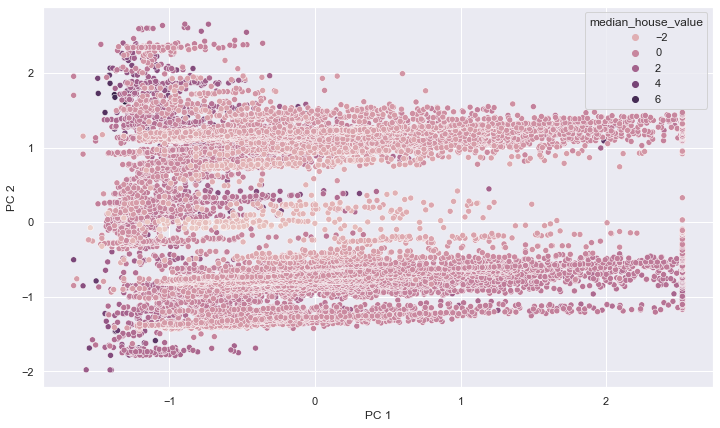

In [39]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pca_df, x='PC 1', y='PC 2', hue="median_house_value");

(f)

(g)

## Clustering

#### **Q2**

**10 points** = $(1 + 2 + 3 + 1.5 + 1.5 + 2)$

A bird detection system that is equipped with multiple sensors is deployed in an observation station in an open space and it detects and collects some information about birds that visit the space. For each detected bird, it is able to collect the following information: 

*   `position` - a value of the form (`x`,`y`,`z`) which indicates the coordinates in a three-dimensional space defined by the LiDAR field of the system. `x` and `y` coordinates are in the range (-500,500) whereas `z` coordinate is in the range (0,150) where 0 indicates the ground level for `z`.
*   `sound_level` - a value in decibels (0-120 dB) of the sound made by the detected bird with 0 indicating no audible sound and 120 indicating maximum sound that can be detected. 
*   `time_of_visit` -  a value indicating number of milliseconds since the 00:00 hours of the day of collection.

The system sends out a table with the above three fields periodically to you. You are leading a team of data scientists to explore if the data collected by this system can be used to distinguish the different species of birds visiting the station located in the open space.  

(a) You decide that using clustering for initially attempting this problem is a good option. How would you *logically* convince your team of this? 

(b) Your team is trying to decide between using K-means and hierarchical clustering, both based on an Euclidean distance measure. Propose a list of preprocessing operations to be performed on the before you use any clustering algorithm on the raw dataset. **Justify** why you include each step. 

(c) An enthusiastic intern in your team selects a subset of *raw* data samples from the dataset, selecting some nocturnal birds that visit all together exactly at midnight everyday and they cannot produce any sound. They all have been observed to consistently sit on the ground along a straight line. He generates the following dendrogram (left) using an agglomerative hierarchical clustering with an appropriate linkage that maximizes intercluster dissimilarity. On the right is a top-view visualization of the arrangement of the birds in the station, based on the dendrogram. The bird B1 has already been placed. Place the birds B2 - B9 on the line with an *appropriate* spacing between them. **Explain** your choice.

<br/>
<br/>

<img width=750 src="https://i.ibb.co/M2ymGvm/nocturnal-birds.png" alt="Nocturnal Birds" border="0" /> 


(d)  You are informed by a group of expert ornitholigists that groups of birds that belong to different species, tend to visit the station in almost equal numbers per species. Based on this information, what type of linkage would you use in the hierarchical clustering algorithm? **Justify** your choice.

(e) The group of ornithologists have identified that exactly 10 species of birds visit the station. Does this information help you decide between choosing the K-means and hierarchical clustering algorithms? **Explain** why/why not.

(f) Briefly outline any **two** ways in which you can verify if the clustering you have performed has captured the natural grouping that exists among the actual data samples.

(a)

(b)

(c)

(d)

(e)

(f)

## Cross Validation

#### **Q3**

**10 points** = $(1 + 2 + 3 + 1.5 + 1 + 1.5)              $




Given below is a pair of plots generated while cross-validating a K-NN model trained on a dataset with various values of K using 12-fold CV and Leave-one-out (LOOCV) methods :                             

<img width=750 src="https://i.ibb.co/cyY7m6X/cv-graphs.png" alt="Trees" border="0" /> 

Answer the following questions:

(a) What is the motivation behind using cross-validation techniques such as LOOCV and k-fold CV over having a validation set?

(b) What could possibly explain the difference in the error curves in the two methods in the plots? 

(c) Describe how similar (or) different the error curves generated on the same dataset would look like for another independent run of **each of** the methods *12-fold* and *LOOCV*, compared to the plots above. **Explain** the reason for your answer in each case.    

(d) Under which circumstances would you would favour using LOOCV over k-fold CV?  

(e) Based on the above plots, what is the best value for the hyperparameter K of the model? **Explain why.** 

(f) What type of hyperparameter search do the above plots illustrate? **Explain**.



## Inference and Bootstrapping

#### **Q4**

**16 points** = $(1.5 + 1.5 + 1.5 + 1.5 + 2 + 2 + 1.5 + 1.5 + 1.5 + 1.5)$

The dataset loaded in the next cell consists of data from a drug trial experiment.  
* `subject_type` indicates 0 for if a subject is a *control* and 1 if taking *treatment*. 
* `daily_dosage` indicates the dosage of the drug in millilitres (mL)
* `life_expectancy` show the projected age (year) upto which that the subject is expected to live.

Let the field `subject_type` in the dataset correspond to $x_{type}$, `daily_dosage` to $x_{dosage}$ and `life_expectancy` to $y$.

  (a) Now, consider the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{type} x_{type} + \beta_{0} + \epsilon$$

  Write your code to perform this regression and list the coefficient estimates $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtained by running your code.

  (b) Run a bootstrap of the dataset over 500 iterations, and collect the coefficients $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtain in each iteration. 

  (c) Use the coefficient estimates that you collected in (b) and estimate the standard errors of all the 3 coefficients $S.E.(\hat{\beta}_{dosage})$, $S.E.(\hat{\beta}_{type})$ and $S.E.(\hat{\beta}_{0})$. 
  
  (d) Plot a histogram to observe the distribution of each of the collected coefficient estimates. What do you observe?

  (e) Provide a 95% confidence interval for each of the coefficient estimates. What does this interval mean?

  (f) Generate the scatterplot for the points in the dataset with `daily_dosage` on the x-axis, `life_expectancy` on the y-axis and the points colored by the `subject_type` value (separate colors to indicate the types 0 and 1) with the collected 500 bootstrap sampled fits overlaid. To make the plot easier to read, reduce the transparency of the lines.

  (g) Based on all the above, **explain** intuitively what is conveyed by the plot you generated in (f).
    
  (h) Make a scatterplot of the bootstrapped coefficients, $\left(\beta_{type}^{\ast}, \beta_{dosage}^{\ast}\right)$ against one another. **Comment** on the overall distribution of these two coefficients **and** the nature of correlation between them.
  
  (i) Similar to above, estimate the coefficient estimates $\hat{\beta}_{dosage}$ and $\hat{\beta}_{0}$ and the standard error of the dosage coefficient $S.E.(\hat{\beta}_{dosage})$ by bootstrapping the dataset over 500 iterations and fitting the dataset in the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{0} + \epsilon$$
  
  (j) Comparing the results in (i) and (c), what can you comment about the relationship of `daily_dosage` and `subject_type` with `life_expectancy`? 

**Bonus : (3 points)**
> (k) In a bootstrap of the dataset over 500 iterations similar to the above, perform an independent t-test with an $\alpha=0.05$ significance level, using `scipy.stats.ttest_ind` on the `life_expectancy` of these two groups . Collect the p-values and plot the p-value histogram. 

In [ ]:
trials = pd.read_csv(path.format('drug-trials.csv'))

## Feature Engineering

#### **Q5**

**4 points** = $(1.5 + 2.5)$                

Given below is a cell that loads a dataset that contains features representing the body measurements of certain types of sharks in various regions in Canada.

Using programming, perform analyses using the following methods to identify the outlier samples in the dataset : 

  (a) For each *feature* among `body_length`, `fin_length` and `tail_length` in the dataset, use a box plot to visualize the feature values (along y-axis) grouped by `region` feature (show on x-axis). Identify the `region` and `feature` (other than `region`) that shows the highest number of outliers. 

  (b) For the `region` and the `feature` you chose in (a), use the Q3-Q1 Inter-Quartile Range (IQR) to identify and list the rows of the outliers from the dataframe. 


In [ ]:
sharks = pd.read_csv(path.format('ca-sharks.csv'))

#### **Q6**

**8 points** = $(1 + 3 + 2 + 2 )$                

For the questions below, answer briefly by inspecting the dataset below. (There is no need to use any programming) :

This is a representative subset of a collected dataset with information about used buses across three Canadian cities. A model needs to be fit to predict the selling price `Price($)` of a bus. `--` indicates that the information is not available. 

ID|City|Province|Vehicle model|Category|Mileage(kmpl)|Certification|Year|Num_Damages|Price($) 
--|--|--|--|--|--|--|--|--|--|
1|Montréal|QC|CX-120|School|2.5|Certified|2018|3|44900
2|Vancouver|BC|AL-100|Tourism|5|Not certified|2016|--|22380
3|Toronto|ON|WS-978|Tourism|--|Certified|--|--|30000
4|Vancouver|BC|RR8|Factory|1.5|Certified|2012|5|10500
5|Toronto|ON|GH-50|Factory|4.5|Not certified|2015|--|12000
6|Montréal|QC|--|School|--|Not certified|2010|--|8000


(a) List the features that you would remove from the dataset before using it for model fitting. Give valid **reasons** for your answer.

(b) List the features that need to be encoded in this dataset and outline which encoding schemes your would use in each case. Give valid **reasons** for your answer.

(c) What type of an imputation scheme would make sense for the missing values in each of the fields `Year` and `Mileage`? Give valid **reasons** for your answer.

(d) You propose to use the simplest sparsity-based method to select the best features among those given in the dataset. In just two lines, describe the high-level procedure to do this.